In [1]:
import numpy as np
from numpy import array, pi
import matplotlib.pyplot as plt
from tqdm import tqdm

from utils import re_scale, freq_padding, blockshaped, img_shift
from FFT import FFT2, IFFT2
from freq_pass_filter import ideal_low_pass, gaussian_low_pass, butterworth_low_pass
from freq_pass_filter import ideal_high_pass, butterworth_high_pass
from freq_pass_filter import inverse_pass, wiener_pass

In [2]:
image_path_list = ['baboon', 'F16', 'lena', 'Noisy']
image_list = [np.fromfile("./data/"+path+".raw", dtype=np.uint8).reshape(512, 512) for path in image_path_list]

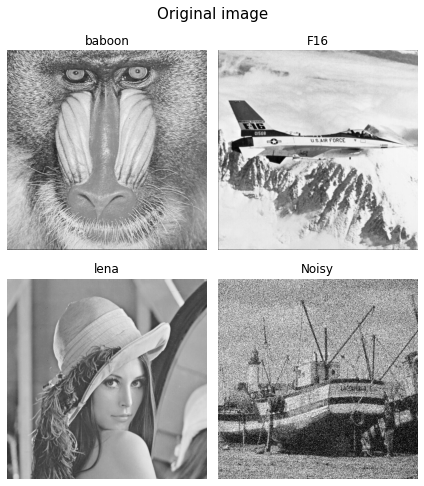

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6,7))
for i, ax_i in enumerate(axs.flat):
    ax_i.imshow(np.real(image_list[i]).astype(np.uint8), cmap='gray')
    ax_i.axis("off")
    ax_i.set_title(image_path_list[i])

fig.suptitle("Original image", size=15)
fig.tight_layout()
plt.show()

In [7]:
padding_image_list = []
for sub_image in image_list:
    padding_image_list.append(freq_padding(sub_image))

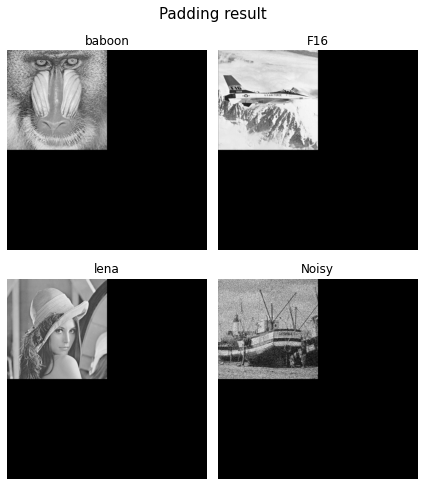

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6,7))
for i, ax_i in enumerate(axs.flat):
    ax_i.imshow(np.real(padding_image_list[i]).astype(np.uint8), cmap='gray')
    ax_i.axis("off")
    ax_i.set_title(image_path_list[i])

fig.suptitle("Padding result", size=15)
fig.tight_layout()
plt.show()

In [9]:
freq_map_image_list = [FFT2(sub_image) for sub_image in padding_image_list]

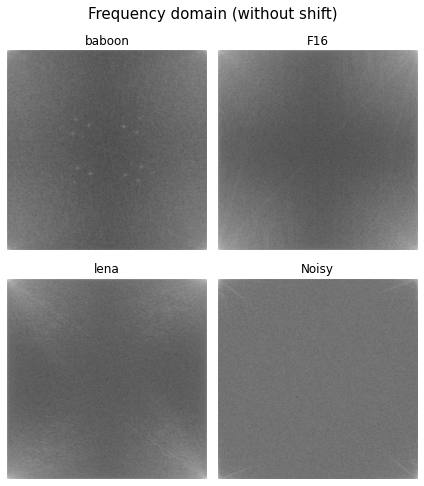

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6,7))
for i, ax_i in enumerate(axs.flat):
    ax_i.imshow(np.log(abs(freq_map_image_list[i])), cmap='gray')
    ax_i.axis("off")
    ax_i.set_title(image_path_list[i])

fig.suptitle("Frequency domain (without shift)", size=15)
fig.tight_layout()
plt.show()

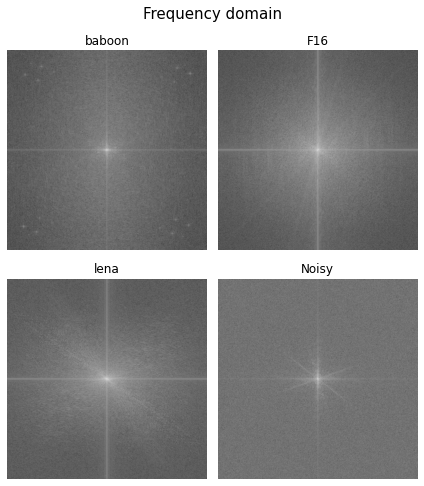

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6,7))
for i, ax_i in enumerate(axs.flat):
    ax_i.imshow(np.log(abs(img_shift(freq_map_image_list[i]))), cmap='gray')
    ax_i.axis("off")
    ax_i.set_title(image_path_list[i])

fig.suptitle("Frequency domain", size=15)
fig.tight_layout()
plt.show()

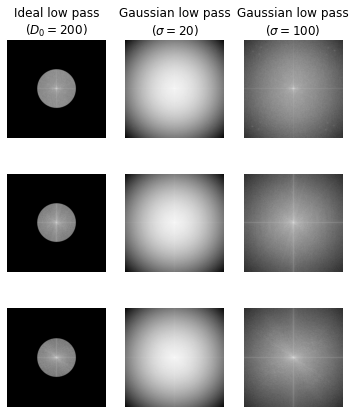

In [83]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(6,7))

for i in range(3):
    for j in range(3):
        temp_freq_map = img_shift(freq_map_image_list[i])
        if j == 0:
            temp_img = abs(ideal_low_pass(temp_freq_map, D0=200))
            temp_img[temp_img > 0] = np.log(temp_img[temp_img > 0])
            temp_img = re_scale(temp_img)
            axs[i,j].imshow(temp_img, cmap='gray')
            if i == 0:
                axs[i,j].set_title("Ideal low pass\n" + r"($D_0=200$)")
        elif j == 1:
            temp_img = abs(gaussian_low_pass(temp_freq_map, sigma=50))
            temp_img[temp_img > 0] = np.log(temp_img[temp_img > 0])
            temp_img = re_scale(temp_img)
            axs[i,j].imshow(temp_img, cmap='gray')
            if i == 0:
                axs[i,j].set_title("Gaussian low pass\n" + r"($\sigma=20$)")
        else:
            temp_img = abs(gaussian_low_pass(temp_freq_map, sigma=200))
            temp_img[temp_img > 0] = np.log(temp_img[temp_img > 0])
            temp_img = re_scale(temp_img)
            axs[i,j].imshow(temp_img, cmap='gray')
            if i == 0:
                axs[i,j].set_title("Gaussian low pass\n"+r"($\sigma=100$)")
        axs[i,j].axis('off')
plt.show()

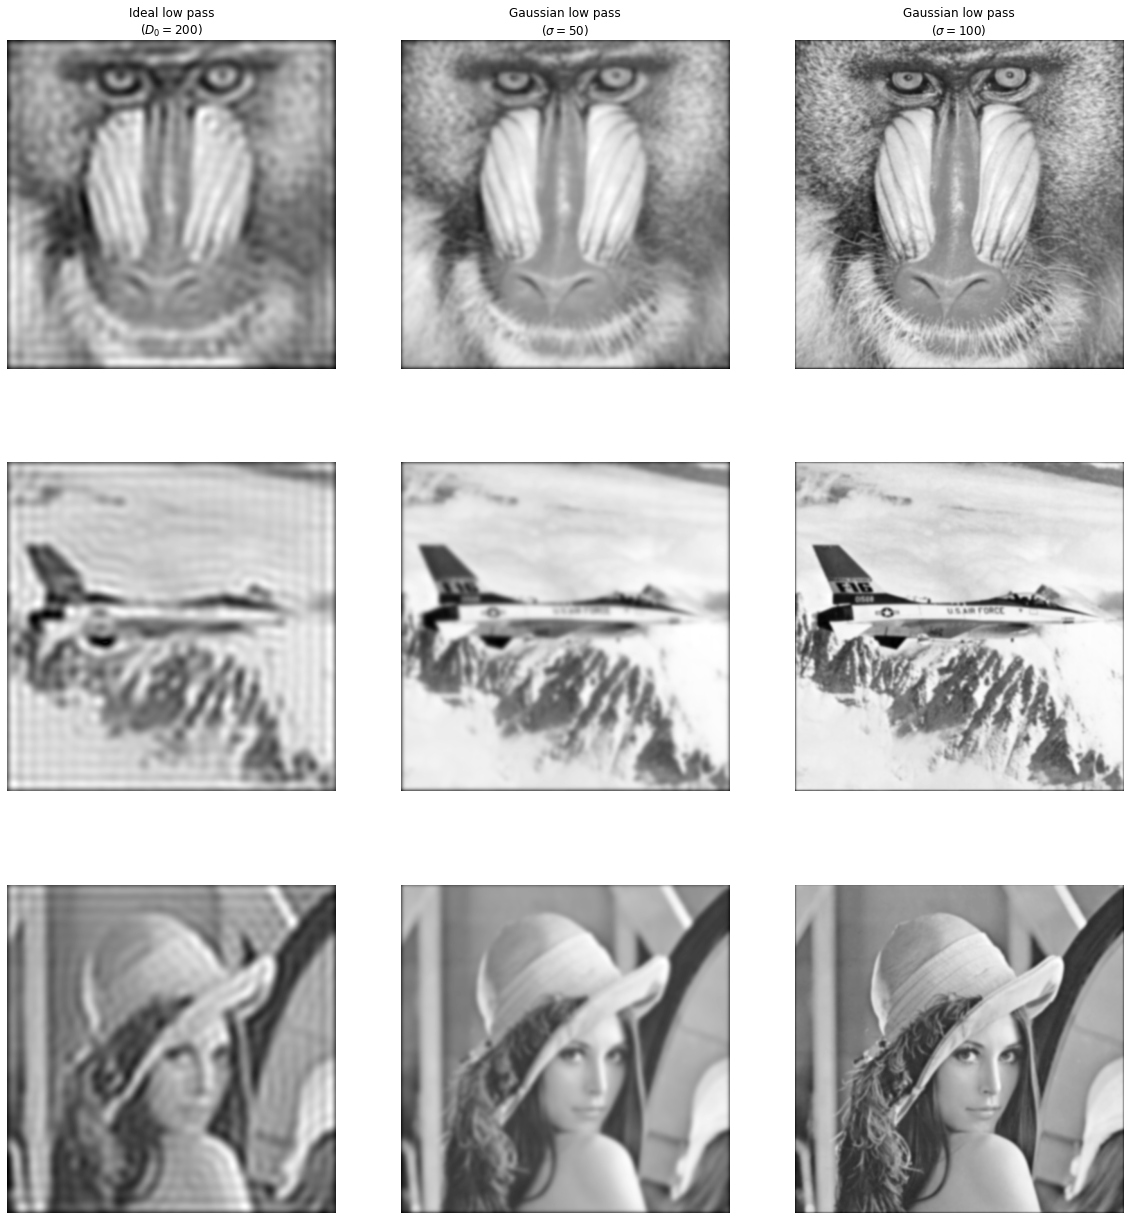

In [89]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,22))

for i in range(3):
    for j in range(3):
        temp_freq_map = img_shift(freq_map_image_list[i])
        if j == 0:
            temp_img = IFFT2(img_shift(ideal_low_pass(temp_freq_map, D0=50)))[:512,:512]
            axs[i,j].imshow(abs(temp_img), cmap='gray')
            if i == 0:
                axs[i,j].set_title("Ideal low pass\n" + r"($D_0=50$)")
        elif j == 1:
            temp_img = IFFT2(img_shift(gaussian_low_pass(temp_freq_map, sigma=50)))[:512,:512]
            axs[i,j].imshow(abs(temp_img), cmap='gray')
            if i == 0:
                axs[i,j].set_title("Gaussian low pass\n" + r"($\sigma=50$)")
        else:
            temp_img = IFFT2(img_shift(gaussian_low_pass(temp_freq_map, sigma=100)))[:512,:512]
            axs[i,j].imshow(abs(temp_img), cmap='gray')
            if i == 0:
                axs[i,j].set_title("Gaussian low pass\n"+r"($\sigma=100$)")
        axs[i,j].axis('off')
plt.show()